In [24]:
import pandas as pd

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [26]:
df = pd.read_csv('dataframe_w_hours_days.csv')
df

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,DAY,HOUR,AVAILABILITY
0,1,2023-12-01 00:00:03,2023-11-30 23:58:15,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.26250,Friday,0,0.000
1,2,2023-12-01 00:00:03,2023-11-30 23:58:47,BLESSINGTON STREET,20,14,6,OPEN,Blessington Street,53.3568,-6.26814,Friday,0,0.300
2,3,2023-12-01 00:00:03,2023-11-30 23:50:47,BOLTON STREET,20,12,7,OPEN,Bolton Street,53.3512,-6.26986,Friday,0,0.350
3,4,2023-12-01 00:00:03,2023-11-30 23:50:20,GREEK STREET,20,12,8,OPEN,Greek Street,53.3469,-6.27298,Friday,0,0.400
4,5,2023-12-01 00:00:03,2023-11-30 23:55:45,CHARLEMONT PLACE,40,5,35,OPEN,Charlemont Street,53.3307,-6.26018,Friday,0,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294848,113,2023-09-30 23:30:02,2023-09-30 23:28:30,MERRION SQUARE SOUTH,40,32,6,OPEN,Merrion Square South,53.3386,-6.24861,Saturday,23,0.150
3294849,114,2023-09-30 23:30:02,2023-09-30 23:29:08,WILTON TERRACE (PARK),40,39,1,OPEN,Wilton Terrace (Park),53.3337,-6.24834,Saturday,23,0.025
3294850,115,2023-09-30 23:30:02,2023-09-30 23:20:54,KILLARNEY STREET,30,6,24,OPEN,Killarney Street,53.3548,-6.24758,Saturday,23,0.800
3294851,116,2023-09-30 23:30:02,2023-09-30 23:26:04,BROADSTONE,30,21,9,OPEN,Broadstone,53.3547,-6.27231,Saturday,23,0.300


Let's select a single station

In [27]:
df_single_station = df[df['STATION ID'] == 1]

In [28]:
df_single_station.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,DAY,HOUR,AVAILABILITY
0,1,2023-12-01 00:00:03,2023-11-30 23:58:15,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.2625,Friday,0,0.0
114,1,2023-12-01 00:30:02,2023-12-01 00:28:30,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.2625,Friday,0,0.0
228,1,2023-12-01 01:00:03,2023-12-01 00:58:49,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.2625,Friday,1,0.0
342,1,2023-12-01 01:30:03,2023-12-01 01:29:04,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.2625,Friday,1,0.0
456,1,2023-12-01 02:00:02,2023-12-01 01:59:19,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.2625,Friday,2,0.0


We are trying to predict _availability_ i.e. the ratio of available bikes to bike stands

In [29]:
y = df_single_station['AVAILABILITY']

Let's treat hours as a continuous variable to see if we can find a better fit even with the linear regression

In [30]:
y = df_single_station['AVAILABILITY']
days_hours = df_single_station[['DAY', 'HOUR']]
X = pd.get_dummies(days_hours)
X

,HOUR,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
0,0,True,False,False,False,False,False,False
114,0,True,False,False,False,False,False,False
228,1,True,False,False,False,False,False,False
342,1,True,False,False,False,False,False,False
456,2,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3294283,21,False,False,True,False,False,False,False
3294397,22,False,False,True,False,False,False,False
3294511,22,False,False,True,False,False,False,False
3294625,23,False,False,True,False,False,False,False


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
df_coefs = pd.DataFrame(zip(X.columns, model.coef_))
df_coefs

,0,1
0,HOUR,0.005952
1,DAY_Friday,-0.062549
2,DAY_Monday,0.054739
3,DAY_Saturday,0.122808
4,DAY_Sunday,0.229828
5,DAY_Thursday,-0.102998
6,DAY_Tuesday,-0.087091
7,DAY_Wednesday,-0.154737


In [33]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error: 0.07927018039475202
R-squared (R2): 0.1648472849441448


Results even worse trying to plot _HOURS_ as continuous features

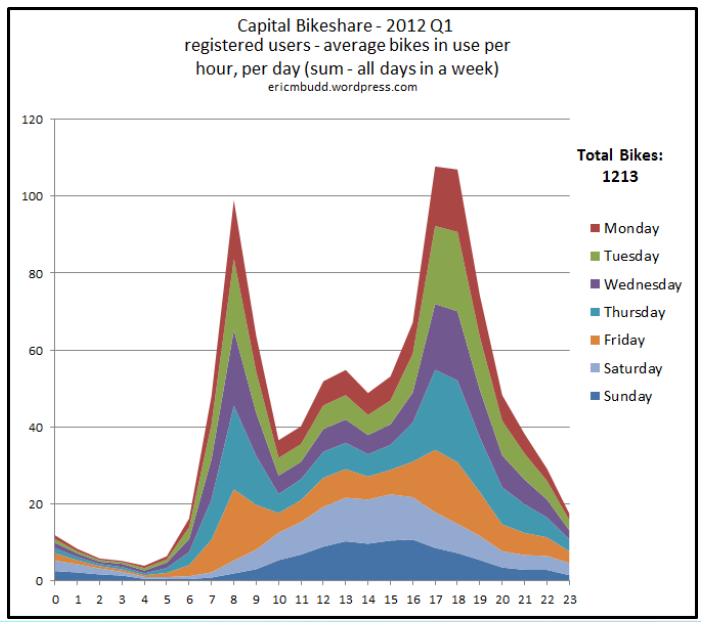

This image is taken from the lecture slides: it plots bike use versus time and there is some very obvious non-linearity

Let's add some non-linear transformations to the _HOURS_ features to see if we can capture this

In [34]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 22.,  0., ...,  0.,  0.,  0.],
       [ 1., 23.,  0., ...,  0.,  0.,  0.],
       [ 1., 23.,  0., ...,  0.,  0.,  0.]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error: 0.062202561068875624
R-squared (R2): 0.34466356073111315
